In [5]:
import pandas as pd 
import numpy as np 

import scipy.stats as stats 

import matplotlib .pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer 


In [9]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [10]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\rudra\AppData\Local\Temp\ipykernel_3364\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [14]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2, random_state=42)

C:\Users\rudra\AppData\Local\Temp\ipykernel_3364\2018150693.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


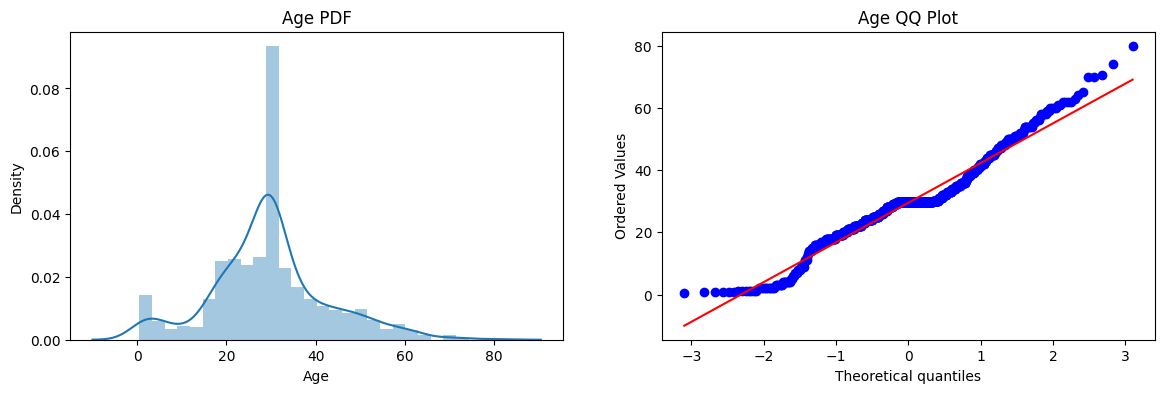

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\rudra\AppData\Local\Temp\ipykernel_3364\534311447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


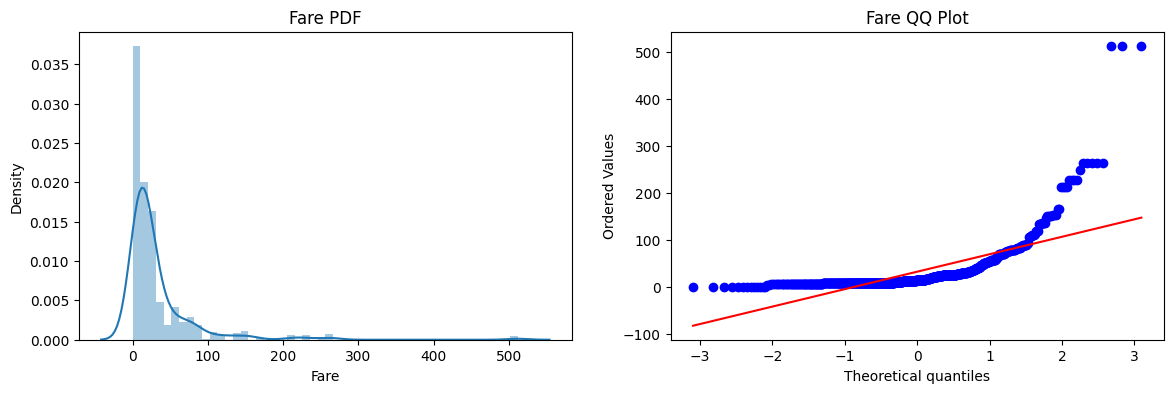

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [17]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred1)

(0.6480446927374302, 0.6759776536312849)

In [19]:
trf = FunctionTransformer(func=np.log1p)

In [22]:
X_train_trn = trf.fit_transform(X_train)
X_test_trn = trf.fit_transform(X_test)

In [23]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_trn,y_train)
clf1.fit(X_train_trn,y_train)

y_pred = clf.predict(X_test_trn)
y_pred1 = clf1.predict(X_test_trn)

accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred1)

(0.6815642458100558, 0.6927374301675978)